# Data Creation

At first, I tried to find the necessary dataset, but my searches were unsuccessful. In the next step, I attempted to generate a dataset that included sentences and labels using ChatGPT. However, I abandoned this idea because I noticed that sometimes the labels were incorrect.

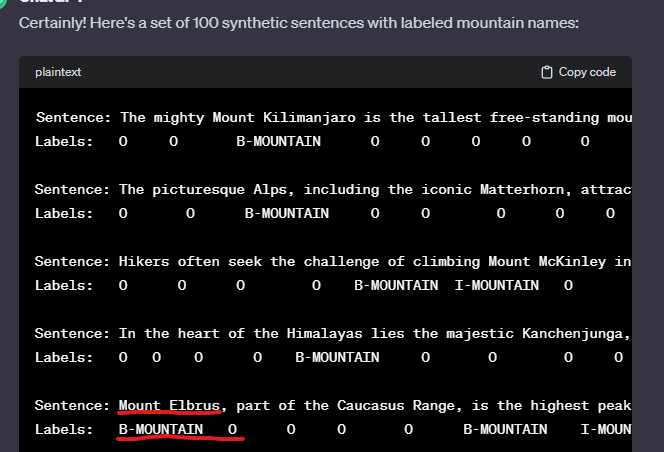

So, I decided to generate sentences with the names of mountains and then manually create labels for each of them. To do this, I made a request for sentence generation, where mountain names would be highlighted as '[Mountain Name]'.

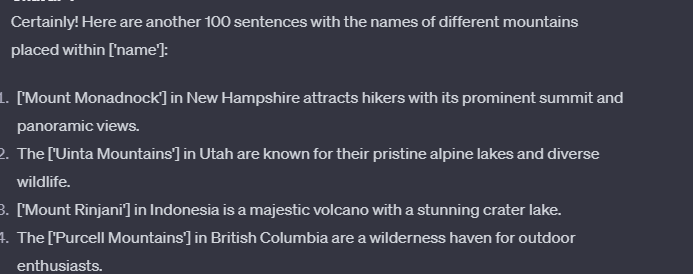

I generated sentences in batches of 100 examples since ChatGPT cannot generate large responses. Then, I recorded these sentences in a file and later converted this file into a CSV format

# Data Labeling

In [3]:
import csv
import re

In [1]:
# path to input file
filename = "Mountains.csv"

In [4]:

rows = []
with open(filename, 'r') as csvfile:
  # creating a csv reader object
  csvreader = csv.reader(csvfile)


  # extracting each data row one by one
  one_more_word = False
  for row in csvreader:
      label = []
      # creation labels
      for word in row[0].split():
        if re.match('\[.*]', word):
          label.append("B-Mountain")
        elif re.match('\[\S*', word):
          one_more_word = True
          label.append("B-Mountain")
        elif re.match('\S*\]',word):
          label.append("I-Mountain")
          one_more_word = False
        elif one_more_word:
          label.append("I-Mountain")
        else:
          label.append('O')
      # clearing sentences from []
      row[0] = row[0].translate( { ord("["): None } )
      row[0] = row[0].translate( { ord("]"): None } )
      row.append(' '.join(label))
      rows.append(row)
# path to output file
output_file = "output.csv"
with open(output_file, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)


    # writing the data rows
    csvwriter.writerows(rows)




In [5]:
!pip install pandas
!pip install numpy

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [5]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('output.csv', sep=',', names=["text",'tag'])

In [8]:
print("Total number of sentences in the dataset: {:,}".format(data["text"].nunique()))

Total number of sentences in the dataset: 234


In [9]:
data["Number of Words"] = data["text"].apply(lambda n: len(n.split()))
print(data.head())
data["Number of Words"]

word_counts = data.groupby("text")["Number of Words"]

                                                text  \
0  'Everest', the tallest mountain in the world, ...   
1  'Denali', formerly known as Mount McKinley, is...   
2  'Kilimanjaro''s snow-capped summit stands as a...   
3  The 'Matterhorn''s iconic pyramid shape is a s...   
4  The Rockies boast numerous majestic peaks, inc...   

                                           tag  Number of Words  
0         B-Mountain O O O O O O O O O O O O O               14  
1           B-Mountain O O O O O O O O O O O O               13  
2               B-Mountain O O O O O O O O O O               11  
3             O B-Mountain O O O O O O O O O O               12  
4  O O O O O O O B-Mountain I-Mountain O O O O               13  


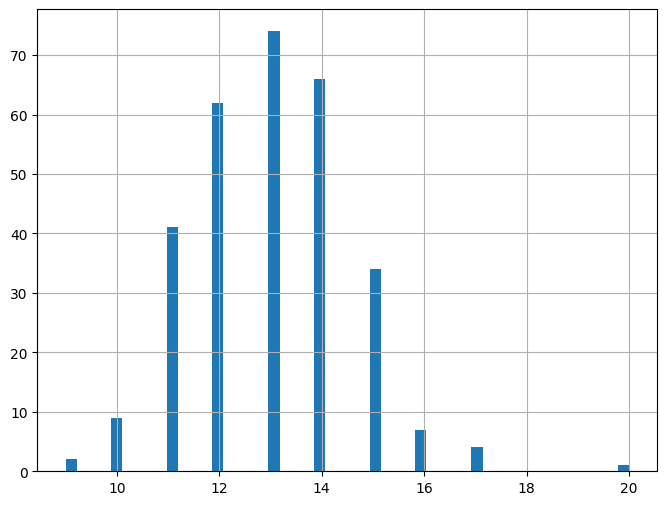

In [10]:
data["Number of Words"].hist(bins=50, figsize=(8,6));

In [11]:
print("Longest sentence in the dataset contains {} words.".format(data["Number of Words"].max()))


Longest sentence in the dataset contains 20 words.
